In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the dataset
df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.iloc[:, :-1].values
X.shape

(42000, 784)

In [4]:
y = df.iloc[:, -1].values
y.shape

(42000,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Single Layer Perceptron

In [7]:
class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return 1 if z > 0 else 0

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(X)):
                predicted = self.predict(X[i])
                error = y[i] - predicted
                self.weights += learning_rate * error * X[i]
                self.bias += learning_rate * error


In [8]:
# Initialize and train the perceptron
input_size = X_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(X_train, y_train, epochs=10, learning_rate=0.01)

In [9]:
correct = 0
for i in range(len(X_test)):
    if perceptron.predict(X_test[i]) == y_test[i]:
        correct += 1

In [10]:
accuracy = (correct / len(X_test)*100)
print("Accuracy:", accuracy)

Accuracy: 99.95238095238095


# CNN

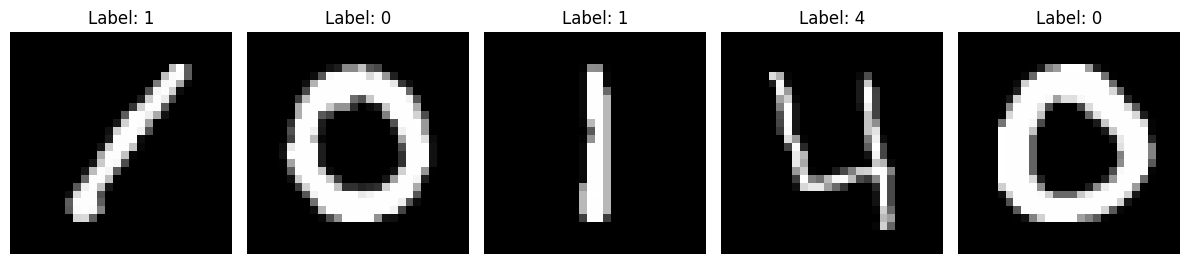

In [11]:
num_images_to_show = 5
fig, axes = plt.subplots(1, num_images_to_show, figsize=(12, 3))
for i in range(num_images_to_show):
    image_data = df.iloc[i, 1:].values.reshape(28, 28)  # Extract pixel values and reshape into a 28x28 matrix
    axes[i].imshow(image_data, cmap='gray')  # Display the image in grayscale
    axes[i].set_title(f"Label: {df.iloc[i, 0]}")  # Set title as the corresponding label
    axes[i].axis('off')  # Hide axes
plt.tight_layout()
plt.show()

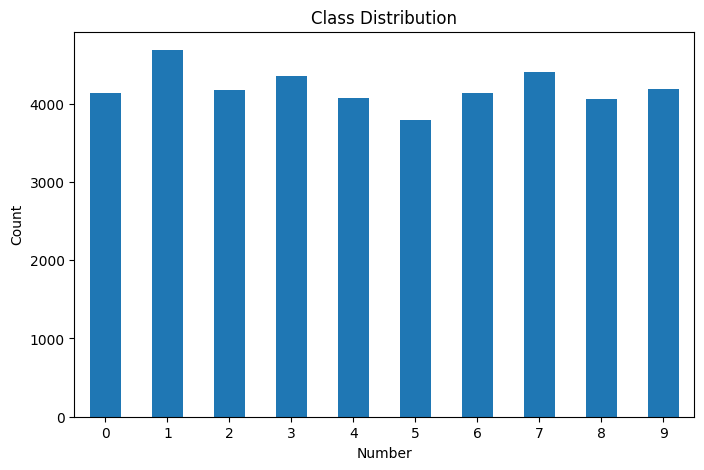

In [12]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Number')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Data normalization
X = df.drop("label", axis=1)  # Features
y = df["label"]  # Labels

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Splitting data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.1, random_state = 42)

# Information about the datasets
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (37800, 784)
Validation set size: (4200, 784)


In [14]:
# Data preparation
X_train_cnn = X_train.reshape(-1, 28, 28, 1)  # Reshape to include the color channel
X_val_cnn = X_val.reshape(-1, 28, 28, 1)

In [3]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Explicit input layer
    layers.ZeroPadding2D(padding=(2, 2)),  # Add 2-pixel padding on each side
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2), 
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2), 
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),    
    layers.Dense(10, activation='relu')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 691,392 (2.64 MB)

 Trainable params: 691,392 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Model training with early stopping
history = model.fit(X_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping])

Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6510 - loss: 0.9503 - val_accuracy: 0.9769 - val_loss: 0.0829
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9705 - loss: 0.1025 - val_accuracy: 0.9800 - val_loss: 0.0761
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9773 - loss: 0.0795 - val_accuracy: 0.9786 - val_loss: 0.0707
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9845 - loss: 0.0565 - val_accuracy: 0.9857 - val_loss: 0.0496
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9863 - loss: 0.0496 - val_accuracy: 0.9893 - val_loss: 0.0374


In [18]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_val_cnn, y_val)
print("Accuracy on validation set:", test_accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9859 - loss: 0.0441
Accuracy on validation set: 0.9892857074737549
